In [1]:
import numpy as np
import cv2
%matplotlib inline
%config InlineBackend.figure_format='retina'
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
from tqdm import tqdm
rdmod = '/media/charles/1TB/Users/Charles Olivier/Downloads/ACHRI Models/vgg_face_caffe/'

from skimage import transform
model = rdmod+'VGG_FACE_deploy.prototxt'
weights = rdmod+'VGG_FACE.caffemodel'

caffe_root = '~/Downloads/caffe-master/' 

import sys
sys.path.insert(0, caffe_root + 'python')
import caffe
mean = np.array([129.1863,104.7624,93.5940])

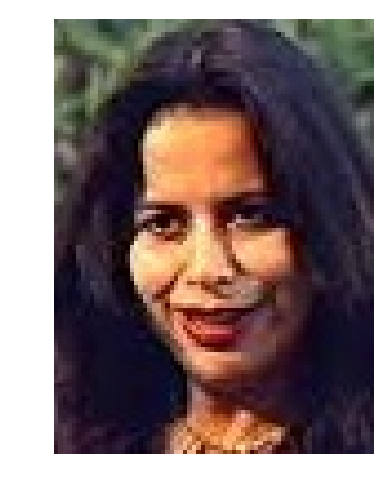

In [30]:
tp = './proc_anger/crop/'
img=tp+'3.jpeg'
img = caffe.io.load_image(img)
plt.imshow(img);
plt.axis('off');

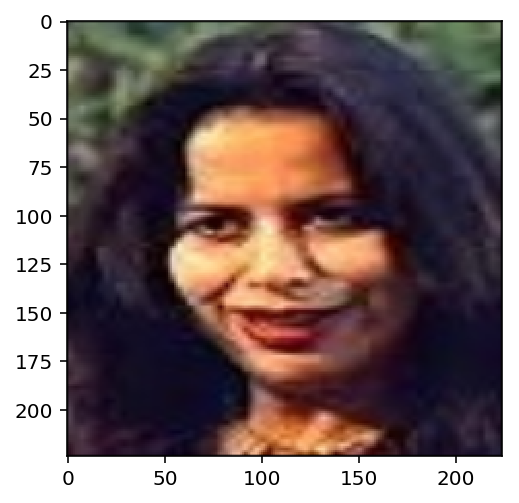

In [31]:
imgP = transform.resize(img, (224, 224, 3))
plt.imshow(imgP);
imgP=imgP[:,:,::-1]*255.0-mean
imgP = imgP.transpose((2,0,1))
imgP = imgP[None,:]

In [32]:
net = caffe.Net(model, weights, caffe.TEST);

In [106]:
tp = './proc_neutral/crop/'
tp_ = './proc_neutral/feats/'

In [107]:
tot=len([name for name in os.listdir(tp)])
count=0
feats=np.zeros((tot,4096))
for file in tqdm(os.listdir(tp)):
    id=int(file.strip('.jpeg'))
    img = caffe.io.load_image(tp+file)
    imgP = transform.resize(img, (224, 224, 3))
    imgP=imgP[:,:,::-1]*255.0-mean
    imgP = imgP.transpose((2,0,1))
    imgP = imgP[None,:]
    res = net.forward_all(data=imgP)
    caffe_ft = net.blobs['fc7']
    feats[id-1,:] = caffe_ft.data[0]
    count+=1
    #if count % 20 == 0:
    #    print('%.0f %%' % (count/float(tot)*100))
print('!!!------FINISHED-----!!!')

100%|██████████| 656/656 [18:45<00:00,  1.70s/it]

!!!------FINISHED-----!!!


In [108]:
np.save(tp_+'vgg.npy', feats)

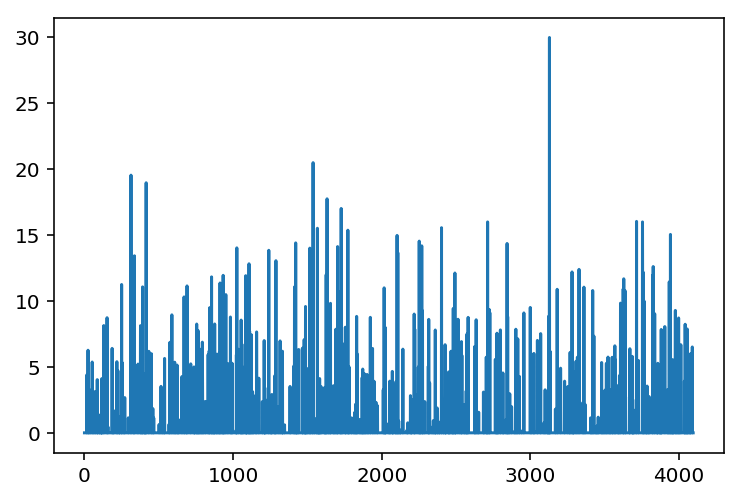

In [104]:
plt.plot(feats[1,:])

1 x 4096


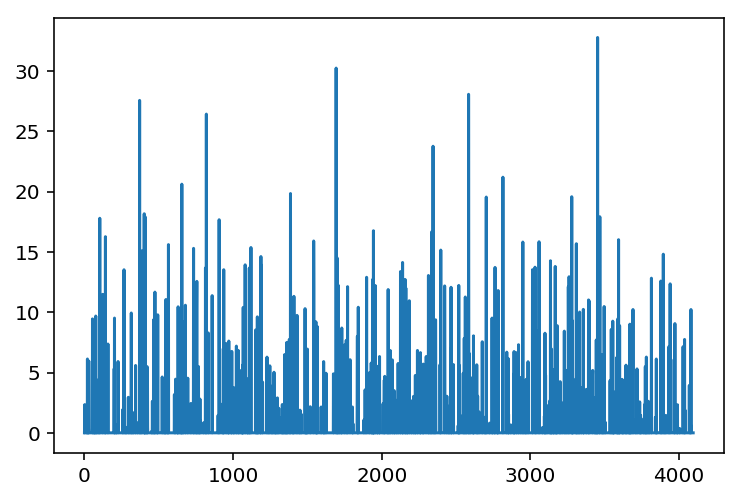

In [60]:
# forward test image and get data
res = net.forward_all(data=imgP)
caffe_ft = net.blobs['fc7']
print(caffe_ft.shape[0],'x', caffe_ft.shape[1])
plt.plot(caffe_ft.data[0])

In [57]:
x=rdmod+'names.txt'
file_object = open(x, 'r')
names=[]
for lines in file_object:
    names.append(lines.strip('\n'))

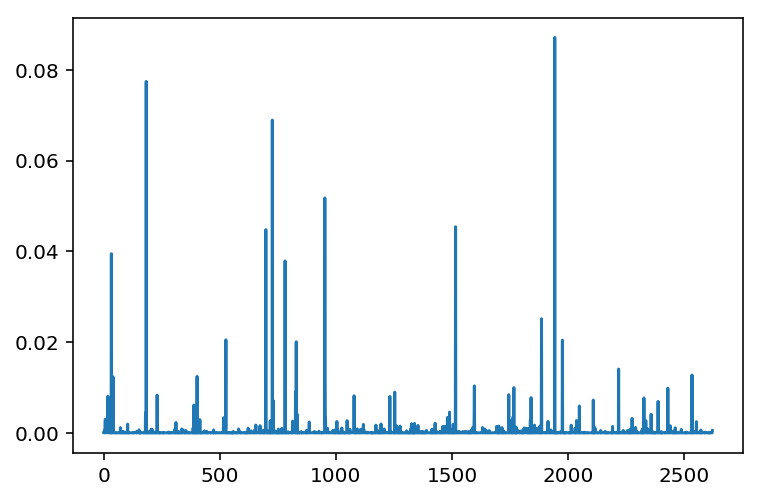

In [58]:
plt.plot(res['prob'][0]); # identity of image from training dataset

In [59]:
names[np.argmax(res['prob'][0])]

'Patricia_Quinn'

In [ ]:
# %load x
/media/charles/1TB/Users/Charles Olivier/Downloads/ACHRI Models/vgg_face_caffe/names.txt

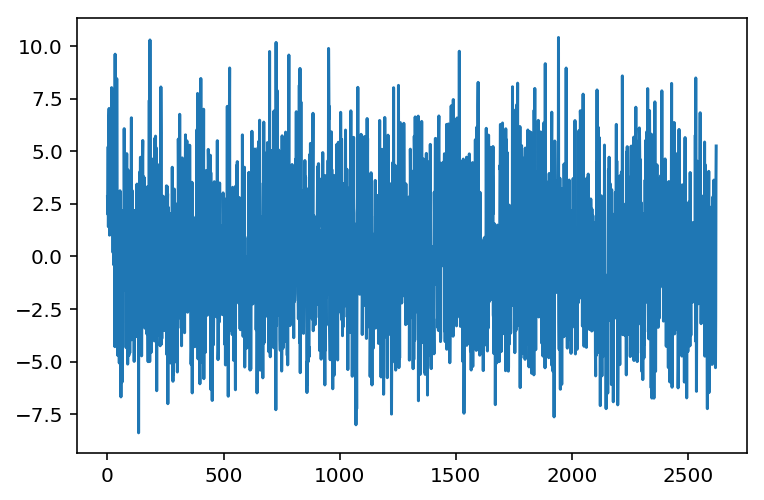

In [35]:
plt.plot(caffe_ft.data[0])